In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task

Your task is to build the best model possible using [this dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vRLHJOe6ntDC42VgSVJmp4amJzR_ESF0YDusUKOBTejsI241KjXYZK6LM6YKEHjMqgV3VIaNC10SeSh/pub?output=csv). You can copy and paste the link into `pd.read_csv()`

Your goal is to predict the 5-Year Career Longevity for NBA Rookies or whether or not they are likely to remain in the [NBA](https://en.wikipedia.org/wiki/National_Basketball_Association) for at least 5 years.
> y = 0 if career years played < 5  
y = 1 if career years played >= 5



The data given is from [data.world](https://data.world/exercises/logistic-regression-exercise-1). The data dictionary is given below:

Variable Name | Description
--- | ---
Name | Name of player
GP | Number of games played
MIN | Minutes played
PTS | Average points per game
FGM | Field Goals Made
FGA | Field Goal Attempts
FG% | Field Goal Percentage
3P Made | 3 Pointers Made
3PA | 3 Point Attempts
3P% | 3 Point Percentage
FTM | Free Throws Made
FTA | Free Throw Attempts
FT% | Free Throw Percentage
OREB | Offensive Rebounds
DREB | Defensive Rebounds
REB | Rebounds
AST | Assists
STL | Steals
BLK | Blocks
TOV | Turnovers
TARGET_5Yrs | Target variable: Yes if career length >= 5 years, No if career length < 5 years


In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Data/nba_rookies - nba_rookies.csv')

In [4]:
# check for duplicates
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [5]:
df.duplicated().sum()

0

In [6]:
#Check for missing data
df.isna().sum().sum()

0

In [7]:
df.columns = df.columns.str.lower()

In [8]:
# Check the class balance
df['target_5yrs'].value_counts()

Yes    819
No     499
Name: target_5yrs, dtype: int64

In [9]:
# split data into train and test sets...notice that stratify = y will 
# give the same proportion of yes/no in our train and test sets
X = df.drop(columns = ['target_5yrs', 'name'])
y = df['target_5yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [10]:
# scale the data and fit a KNN model
# use a pipeline with the scaler and the model
scaler = StandardScaler()
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(scaler, knn)

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [11]:
# Evaluate the accuracy of the model with default settings
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

print(f'train accuracy: {accuracy_score(y_train, train_preds)}')
print(f'test accuracy: {accuracy_score(y_test, test_preds)}')

train accuracy: 0.7651821862348178
test accuracy: 0.6666666666666666


# GridSearchCV
Since we just tried the default model, we should tune the model to optimize our results
to understand you options, use the documentation...the link is provided below.
It is beyond the scope of this course to discuss all of the hyperparameters, but you can try them out and see 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [12]:
# Using the documentation as your guide, define a dictionary of the 
# pararameters you want to tune and the values you want to try out
knn_pipe.get_params()


{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

In [13]:
# Instantiate a gridsearch with the model you want to use and your hyperparamter dictionary
# Depending on how many parameters you are testing and how many options you are trying, this may take awhile!
params = {'kneighborsclassifier__n_neighbors': range(1,20),
          'kneighborsclassifier__weights': ['uniform', 'distance'],
          'kneighborsclassifier__p': [2,3,4] }

In [14]:

knn_grid = GridSearchCV(knn_pipe, params)

knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__p': [2, 3, 4],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [15]:
# Check the optimal combinations of hyperparameters
knn_grid.best_params_

{'kneighborsclassifier__n_neighbors': 19,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [16]:
# extract the best version of the model from the gridsearch object
best_knn = knn_grid.best_estimator_

In [17]:
# Run a classification report on both train and test datasets for the best model. 
# How is your model doing?  Did the performance improve? How is the overfitting?
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

print('Best Model Training Metrics')
print()

Best Model Training Metrics



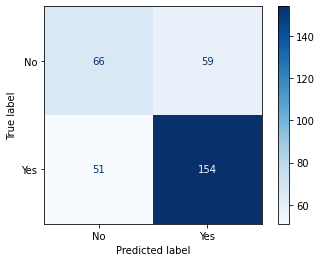

In [18]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, cmap = "Blues")

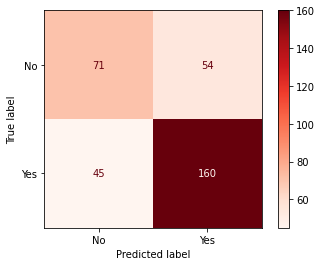

In [19]:
ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test, cmap = 'Reds')

In [20]:
# Your turn! Try creating a pipeline with GridSearchCV using 
# two other classification models! Remember to check the documentation of the model
# for available hyperparameters